# Inspecting centralized optimization for f_global - gradient descent vs PI

- f_global as objective function to minimize 
- only 1 agent
- optimization algortihm = gradient descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt

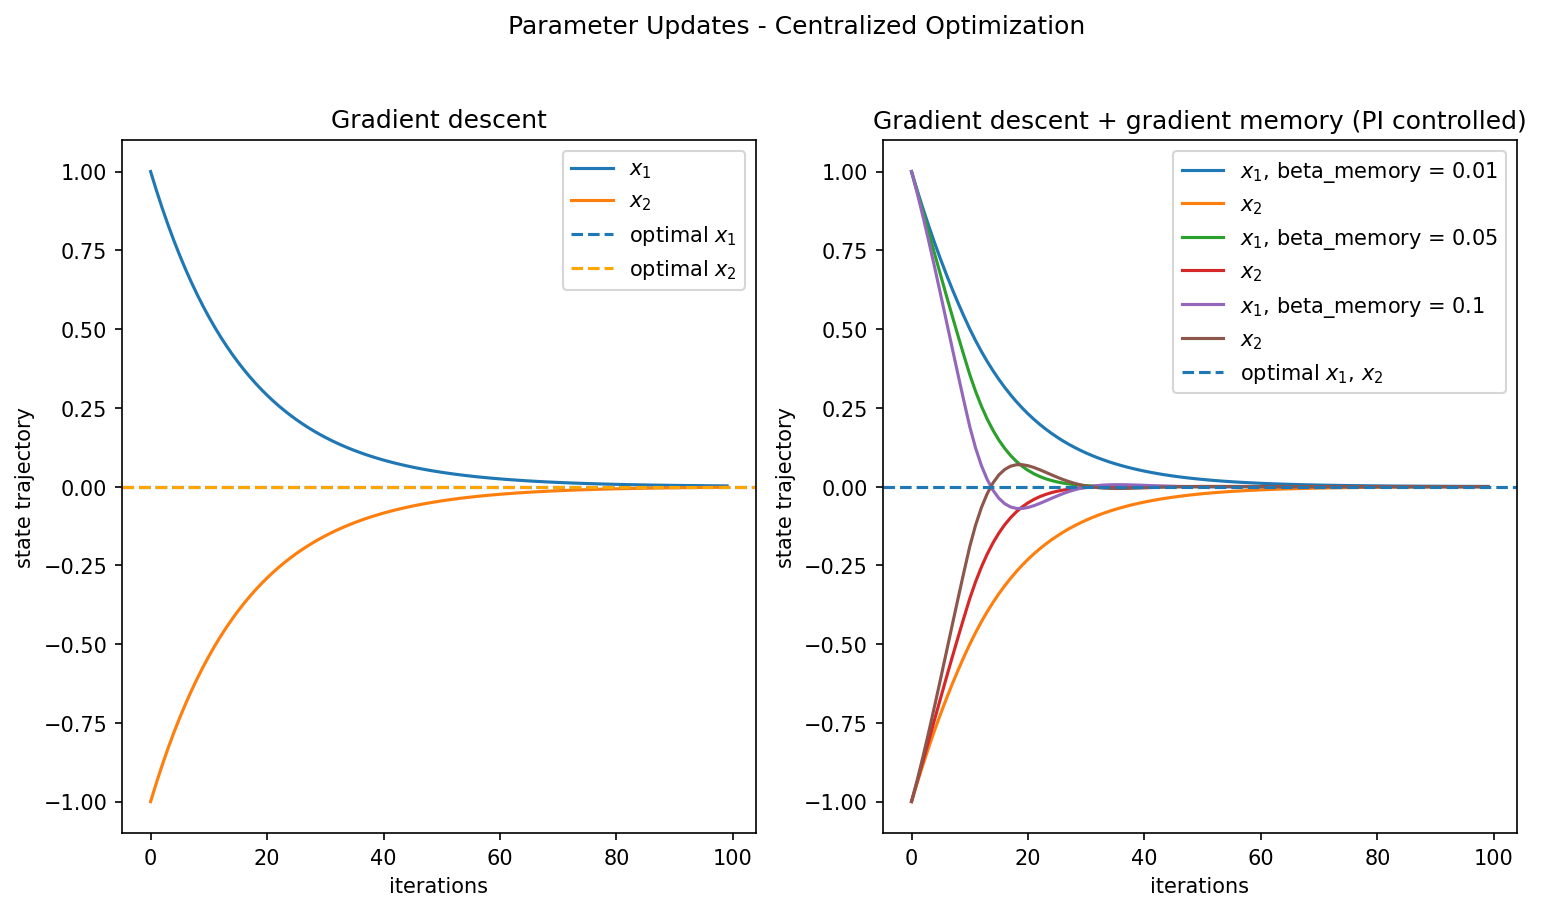

In [16]:
import matplotlib.pyplot as plt

def gradient_vector_f_global_Autograd(x):
    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums=0)
    f_partial_x2 = jax.grad(f_global, argnums=1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)

def f_global(x1, x2):
    return 0.05 * x1**2 + 0.05 * x2**2

optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100

beta = 0.2
alpha = 3

learning_rate = beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    history_x1.append(x1)
    history_x2.append(x2)

    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0]
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

# Plot for the first scenario
axs[0].plot(range(len(history_x1)), history_x1, label="$x_1$")
axs[0].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[0].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$")
axs[0].axhline(y=optimal_x_2, linestyle='dashed', label="optimal $x_2$", color="orange")
axs[0].set_title("Gradient descent")
axs[0].set_xlabel("iterations")
axs[0].set_ylabel("state trajectory")
axs[0].legend()

# Plot for the second scenario


betas_memory = [0.01, 0.05, 0.1]

for beta_memory in betas_memory:
    x1, x2 = 1., -1.
    history_x1 = []
    history_x2 = []
    # beta_memory = 0.1
    len_memory = 10
    gradient_memory_x1 = len_memory * [0]
    gradient_memory_x2 = len_memory * [0]

    for _ in range(n_iterations):
        history_x1.append(x1)
        history_x2.append(x2)

        gradient_memory_x1[:-1], gradient_memory_x2[:-1] = gradient_memory_x1[1:], gradient_memory_x2[1:]
        gradient_memory_x1[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[0])
        gradient_memory_x2[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[1])

        x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0] - beta_memory * sum(gradient_memory_x1)
        x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1] - beta_memory * sum(gradient_memory_x2)

    axs[1].plot(range(len(history_x1)), history_x1, label=f"$x_1$, beta_memory = {beta_memory}")
    axs[1].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[1].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")

fig.suptitle("Parameter Updates - Centralized Optimization", y=1.02)

axs[1].set_title("Gradient descent + gradient memory (PI controlled)")
axs[1].set_xlabel("iterations")
axs[1].set_ylabel("state trajectory")
axs[1].legend()
plt.show()


# Fractrional shennanigans

eq. (2) in *Discrete-Time Fractional-Order PID Controller*


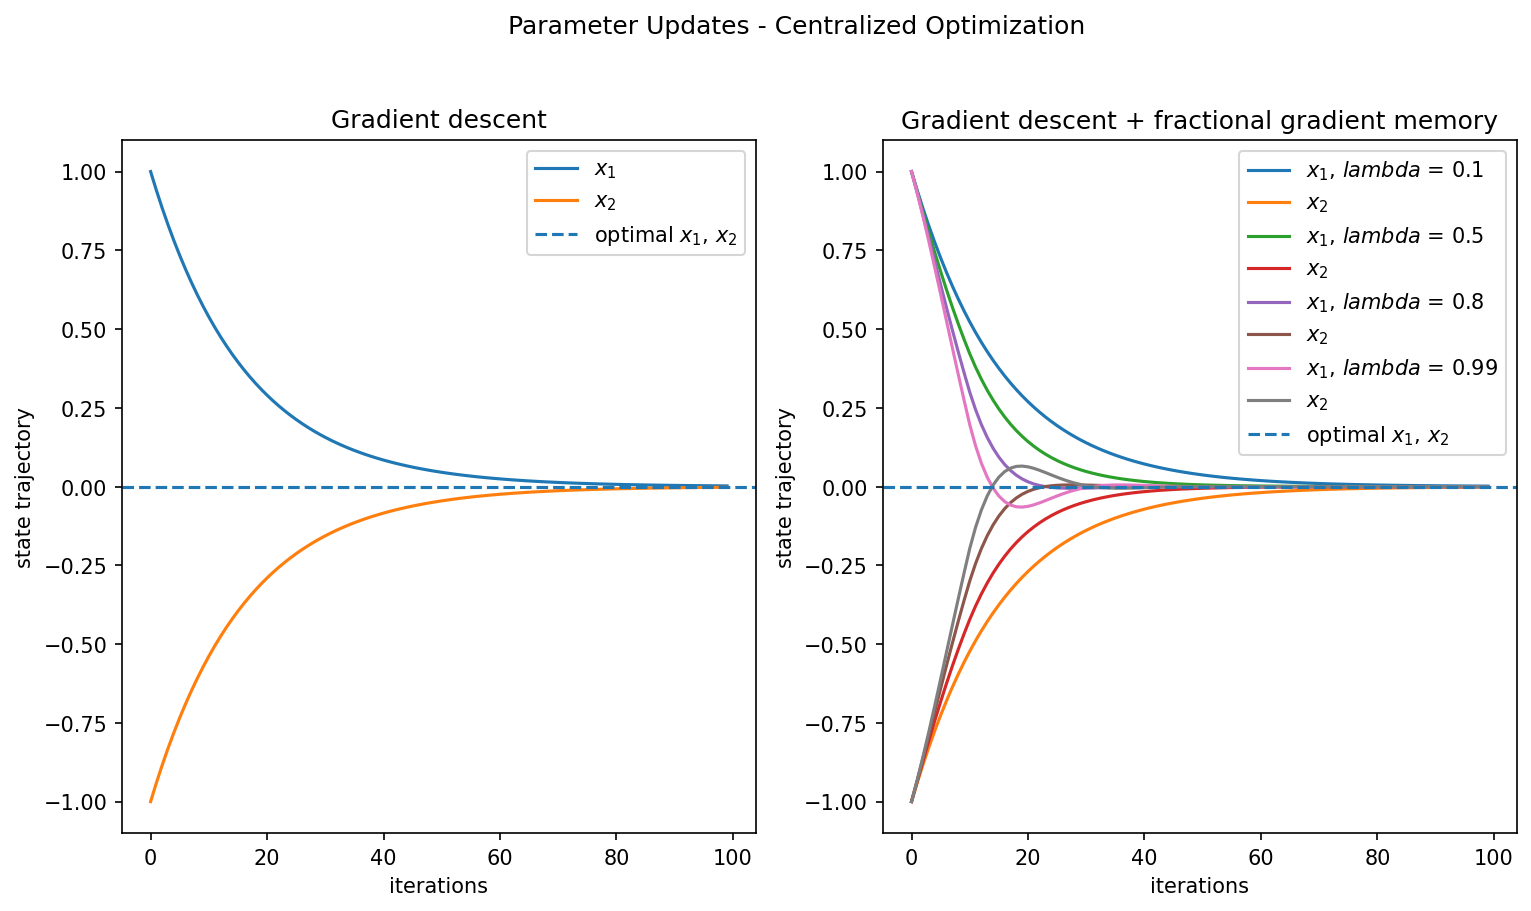

In [13]:
import matplotlib.pyplot as plt
from scipy.special import gamma


_lambdas = [0.1, 0.5, 0.8, 0.99]

def gradient_vector_f_global_Autograd(x):
    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums=0)
    f_partial_x2 = jax.grad(f_global, argnums=1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)

def f_global(x1, x2):
    return 0.05 * x1**2 + 0.05 * x2**2

optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100

beta = 0.2
alpha = 3

learning_rate = beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    history_x1.append(x1)
    history_x2.append(x2)

    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0]
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

# Plot for the first scenario
axs[0].plot(range(len(history_x1)), history_x1, label="$x_1$")
axs[0].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[0].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")
axs[0].set_title("Gradient descent")
axs[0].set_xlabel("iterations")
axs[0].set_ylabel("state trajectory")
axs[0].legend()

# Plot for the second scenario

for _lambda in _lambdas:
    x1, x2 = 1., -1.

    history_x1 = []
    history_x2 = []
    beta_memory = 0.1
    len_memory = 10
    gradient_memory_x1 = len_memory * [0]
    gradient_memory_x2 = len_memory * [0]
    for _ in range(n_iterations):
        history_x1.append(x1)
        history_x2.append(x2)

        gradient_memory_x1[:-1], gradient_memory_x2[:-1] = gradient_memory_x1[1:], gradient_memory_x2[1:]
        gradient_memory_x1[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[0])
        gradient_memory_x2[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[1])

        # print("gamma function returns: ", gamma(_lambda))

        x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0] - beta_memory * ( 1 / gamma(_lambda) ) * sum( [ gradient_memory_x1[n] / ((len_memory-n) ** (1-_lambda)) for n in range(len_memory) ] )
        x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1] - beta_memory * ( 1 / gamma(_lambda) ) * sum( [ gradient_memory_x2[n] / ((len_memory-n) ** (1-_lambda)) for n in range(len_memory) ] )

    axs[1].plot(range(len(history_x1)), history_x1, label=f"$x_1$, $lambda$ = {_lambda}")
    axs[1].plot(range(len(history_x2)), history_x2, label="$x_2$")




axs[1].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")

fig.suptitle("Parameter Updates - Centralized Optimization", y=1.02)

axs[1].set_title("Gradient descent + fractional gradient memory")
axs[1].set_xlabel("iterations")
axs[1].set_ylabel("state trajectory")
axs[1].legend()
plt.show()
